# Seattle Airbnb Price Analysis

## Business Understanding

Airbnb is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities.  
  
My main analysis will be focusing on these discussion:
1. What features affecting the price?
2. What is the most popular property type and how about its price?
3. Can we predict the price accurately?

## Data Understanding

The dataset provides various categorical and numerical features. In futher analysis I will pick only pick some of relevant feature to predict the price.

The main process at this stage are:
1. Import libraries
2. Data loading
3. Data cleaning
4. Exploratory data analysis

### Libraries

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Data loading

In [210]:
df = pd.read_csv('listings.csv')

### Data cleaning

In [211]:
pd.set_option('display.max_columns', None)
df.tail(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/a5974f04-2...,https://a2.muscache.com/im/pictures/a5974f04-2...,https://a2.muscache.com/ac/pictures/a5974f04-2...,https://a2.muscache.com/ac/pictures/a5974f04-2...,52791370,https://www.airbnb.com/users/show/52791370,Virginia,2015-12-30,US,NaN,NaN,NaN,NaN,f,https://a2.muscache.com/ac/pictures/efc75826-1...,https://a2.muscache.com/ac/pictures/efc75826-1...,NaN,1.0,1.0,['phone'],t,f,"South Laurel Street, Seattle, WA 98178, United...",NaN,Rainier Beach,Rainier Valley,Seattle,WA,98178,Seattle,"Seattle, WA",US,United States,47.508453,-122.240607,f,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ...",NaN,$93.00,$450.00,NaN,$250.00,$35.00,2,$20.00,1,7,4 days ago,t,29,59,88,88,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,NaN,Yes,https://a2.muscache.com/ac/pictures/202e4ad6-b...,https://a2.muscache.com/im/pictures/202e4ad6-b...,https://a2.muscache.com/ac/pictures/202e4ad6-b...,https://a2.muscache.com/ac/pictures/202e4ad6-b...,25522052,https://www.airbnb.com/users/show/25522052,Karen,2015-01-03,"Tacoma, Washington, United States",NaN,within an hour,100%,NaN,f,https://a0.muscache.com/ac/users/25522052/prof...,https://a0.muscache.com/ac/users/25522052/prof...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"43rd Avenue East, Seattle, WA 98112, United St...",NaN,Madison Park,Capitol Hill,Seattle,WA,98112,Seattle,"Seattle, WA",US,United States,47.632335,-122.275530,f,Condominium,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$99.00,NaN,NaN,$300.00,$45.00,1,$0.00,3,1125,never,t,30,60,90,179,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3817,10208623,https://www.airbnb.com/rooms/10208623,20160104002432,2016-01-04,Large Lakefront Apartment,"All hardwood floors, fireplace, 65"" TV with Xb...",NaN,"All hardwood floors, fireplace, 65"" TV with Xb...",none,NaN,Also our puppy will be boarded away.,NaN,https://a2.m

In [212]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

I am going to filter some relevant features/columns. I take 17 features that I thought will be the most crucial in determining the price.

In [214]:
rel_col = ['id','neighbourhood','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','amenities','square_feet','review_scores_rating','cleaning_fee','security_deposit','extra_people','price']

df = df[rel_col]
df.head()

,id,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,square_feet,review_scores_rating,cleaning_fee,security_deposit,extra_people,price
0,241032,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,95.0,NaN,NaN,$5.00,$85.00
1,953595,Queen Anne,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,96.0,$40.00,$100.00,$0.00,$150.00
2,3308979,Queen Anne,47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,7.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,97.0,$300.00,"$1,000.00",$25.00,$975.00
3,7421966,Queen Anne,47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,2.0,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,NaN,NaN,NaN,$0.00,$100.00
4,278830,Queen Anne,47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,92.0,$125.00,$700.00,$15.00,$450.00


In [215]:
df.isna().sum()*100/df.shape[0]

id                       0.000000
neighbourhood           10.895757
latitude                 0.000000
longitude                0.000000
property_type            0.026192
room_type                0.000000
accommodates             0.000000
bathrooms                0.419068
bedrooms                 0.157150
beds                     0.026192
amenities                0.000000
square_feet             97.459403
review_scores_rating    16.946045
cleaning_fee            26.977475
security_deposit        51.126244
extra_people             0.000000
price                    0.000000
dtype: float64

**Handling Missing Values and Transform:**  
- Remove the columns with more than 50% missing values.
- Replace missing values at numerical type with median.
- Drop the rows with less than 2 percent missing values

In [216]:
# remove columns with more than 50%
df.drop(columns=['square_feet','security_deposit'], inplace=True)

# transform currency to float
col_currency = ['price','cleaning_fee','extra_people']

for item in col_currency:
  df[item] = df[item].str.replace('$','')
  df[item] = df[item].str.replace(',','').astype(float)

# fill columns with median 
fill_col = ['bathrooms','bedrooms','beds','review_scores_rating','cleaning_fee']
for item in fill_col:
  df[item] = df[item].fillna(df[item].median())
  
# neighbourhood seems important and we can not have nan at this.
# however it should fill with accurate value. 
# At the moment, I will just drop rows with neighborhood equal to nan
df.dropna(subset=['neighbourhood'],axis=0, inplace=True)

# drop rows with less than 2 percent missing values
df.dropna(subset=['property_type'],axis=0, inplace=True)

# for the moment lets remove amenities
df.drop(columns=['amenities'],inplace=True)

# change type bathrooms, bedrooms, beds
type_int = ['bathrooms','bedrooms','beds']
for item in type_int:
  df[item] = df[item].astype('int64')

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3401 entries, 0 to 3817
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3401 non-null   int64  
 1   neighbourhood         3401 non-null   object 
 2   latitude              3401 non-null   float64
 3   longitude             3401 non-null   float64
 4   property_type         3401 non-null   object 
 5   room_type             3401 non-null   object 
 6   accommodates          3401 non-null   int64  
 7   bathrooms             3401 non-null   int64  
 8   bedrooms              3401 non-null   int64  
 9   beds                  3401 non-null   int64  
 10  review_scores_rating  3401 non-null   float64
 11  cleaning_fee          3401 non-null   float64
 12  extra_people          3401 non-null   float64
 13  price                 3401 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 398.6+ KB


In [218]:
df.describe()

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,review_scores_rating,cleaning_fee,extra_people,price
count,3.401000e+03,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000
mean,5.360162e+06,47.629388,-122.332890,3.378712,1.202882,1.319612,1.752426,94.811232,58.917377,11.038224,129.286092
std,2.982572e+06,0.042792,0.031683,1.991616,0.545574,0.885103,1.150900,5.901615,41.871645,17.904806,91.219778
min,4.291000e+03,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,20.000000,5.000000,0.000000,20.000000
25%,2.926776e+06,47.609798,-122.354343,2.000000,1.000000,1.000000,1.000000,94.000000,35.000000,0.000000,75.000000
50%,5.728739e+06,47.623883,-122.328863,3.000000,1.000000,1.000000,1.000000,96.000000,50.000000,0.000000,100.000000
75%,7.902137e+06,47.663040,-122.310483,4.000000,1.000000,2.000000,2.000000,98.000000,70.000000,20.000000,150.000000
max,1.034016e+07,47.733358,-122.252230,16.000000,8.000000,6.000000,15.000000,100.000000,300.000000,300.000000,1000.000000


### Exploratory data analysis

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

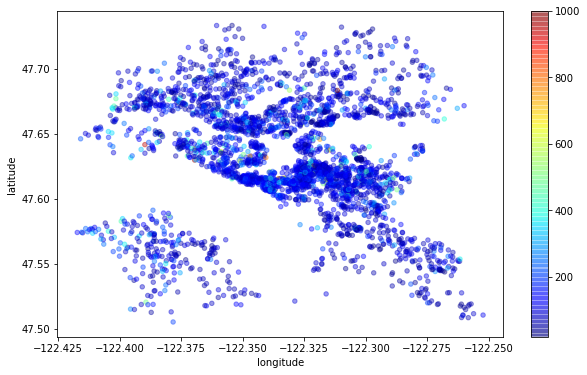

In [219]:
df.plot(kind='scatter', x='longitude',y='latitude', alpha=0.4, figsize=(10,6),c=df['price'], cmap=plt.get_cmap('jet'),colorbar=True, sharex=False)

#### Categorical Feature

In [220]:
df_categorical =df.select_dtypes(include=['object'])

In [221]:
df_neighbourhood = df_categorical.groupby('neighbourhood')['neighbourhood'].agg('count').to_frame('count').reset_index().sort_values(by='count', ascending=False)
df_property_type = df_categorical.groupby('property_type')['property_type'].agg('count').to_frame('count').reset_index().sort_values(by='count', ascending=False)
df_room_type = df_categorical.groupby('room_type')['room_type'].agg('count').to_frame('count').reset_index().sort_values(by='count', ascending=False)

Text(0.5, 1.0, 'Neighbourhood')

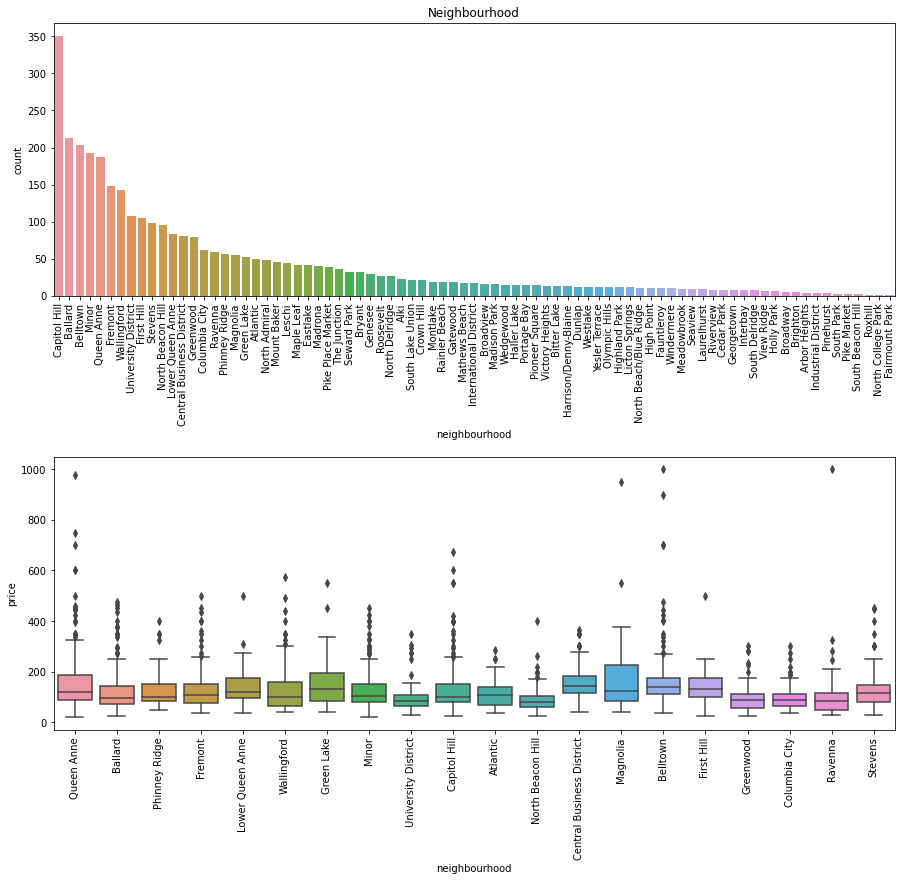

In [222]:
fig, axes = plt.subplots(2, 1, figsize=(16, 14))
fig.tight_layout(pad=14)

top_20_neigh = df_neighbourhood.iloc[:20,:]['neighbourhood']

neigh = sns.boxplot(ax=axes[1], data=df[df['neighbourhood'].isin(top_20_neigh)], x='neighbourhood', y='price')
neigh.tick_params(axis='x',rotation=90)
# neigh.set_title('Neighbourhood')

neigh = sns.barplot(ax=axes[0], data=df_neighbourhood, x='neighbourhood', y='count')
neigh.tick_params(axis='x',rotation=90)
neigh.set_title('Neighbourhood')

In [223]:
df[['neighbourhood']].nunique()

neighbourhood    81
dtype: int64

As we can see that Capital Hill Neighbourhood is the most popular area among other neighbourhood, followed by Bellard, Belltown, Minor, Queen Anne , and Fremont in the top 5.  
  
From the 20 most popular neighbourhood, most of the property cost below $200. However, some places have quite a significant gap between minimum and maximum price. If we see the median price of each neigbourhood, we can say that the spread of the price indicates that neigbourhood is affecting the price of the property.

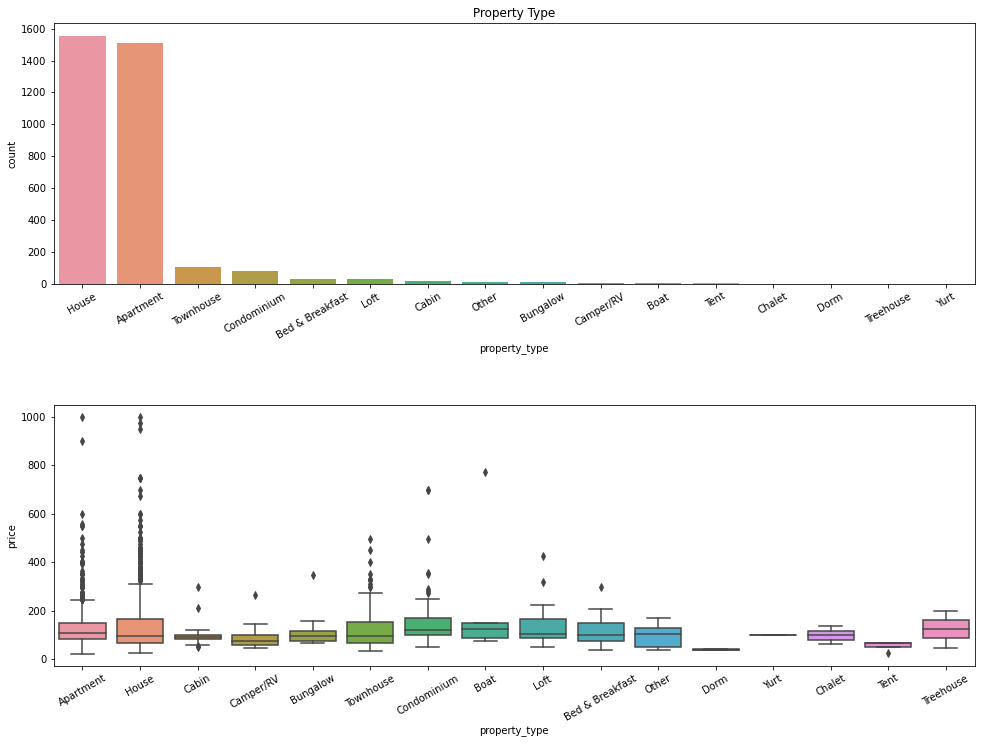

In [224]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12))
fig.tight_layout(pad=10)


prop = sns.barplot(ax=axes[0], data=df_property_type, x='property_type', y='count')
prop.tick_params(axis='x',rotation=30)
prop.set_title('Property Type')

prop = sns.boxplot(ax=axes[1], data=df, x='property_type', y='price')
prop.tick_params(axis='x',rotation=30)
# prop.set_title('Property Type')

In [225]:
df.groupby('property_type').median()[['price']].sort_values('price', ascending=False)

,price
property_type,
Treehouse,124.0
Boat,122.5
Condominium,120.0
Apartment,110.0
Other,103.0
Loft,102.5
Yurt,100.0
Bed & Breakfast,99.0
Chalet,98.5


Interestingly enough in property type feature, the type of property is dominated by house and apartment with both have more than 1400 records.  
  
If we examine the median of each property type, we can see that condominium and boat as well as treehouse have the highest price. Since there is a quite difference between each type of the property, we can also say that there is a relation between property type and price.

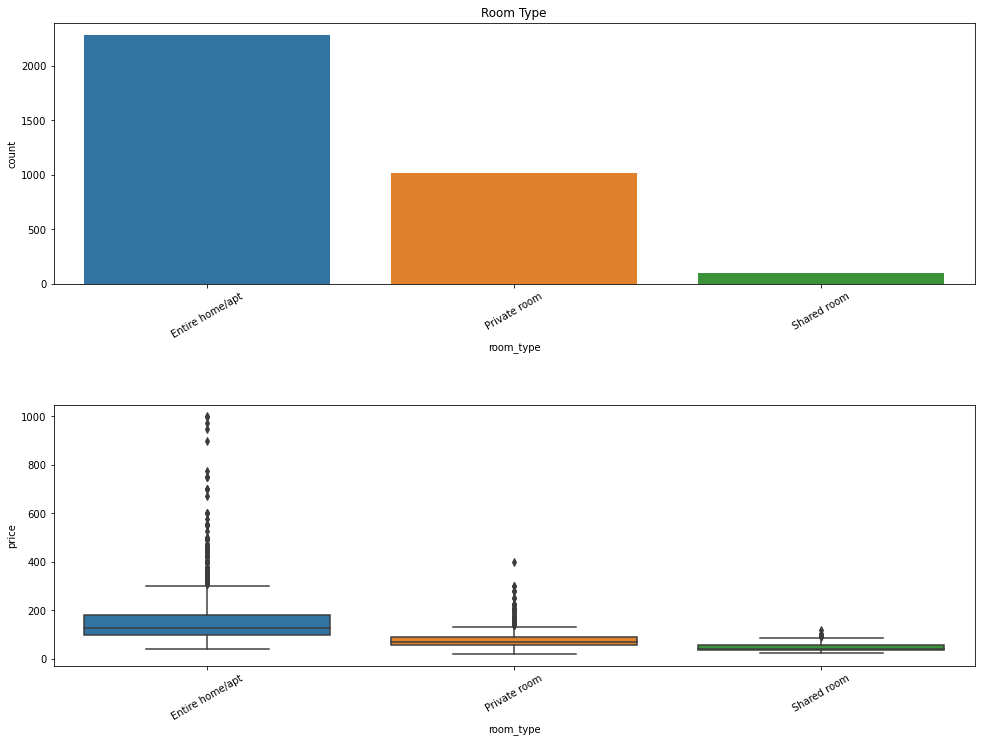

<Figure size 1152x576 with 0 Axes>

In [226]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12))
fig.tight_layout(pad=10)

plt.figure(figsize=(16,8))
room = sns.barplot(ax=axes[0], data=df_room_type, x='room_type', y='count')
room.tick_params(axis='x',rotation=30)
room.set_title('Room Type')

room = sns.boxplot(ax=axes[1], data=df, x='room_type', y='price')
room.tick_params(axis='x',rotation=30)
# room.set_title('Room Type')

As we expect from the room type, entire home / apartment is the most popular choice for airbnb customers. Private room in second place has quite decent number of customer, while shared room is not preffered by the customer.

In terms of price itself, entire home / apartment obviously cost more than private and shared room. The difference is quite distinct, thus we can strongly say that this feature affect the price quite significantly.

#### Numerical Feature

<AxesSubplot:>

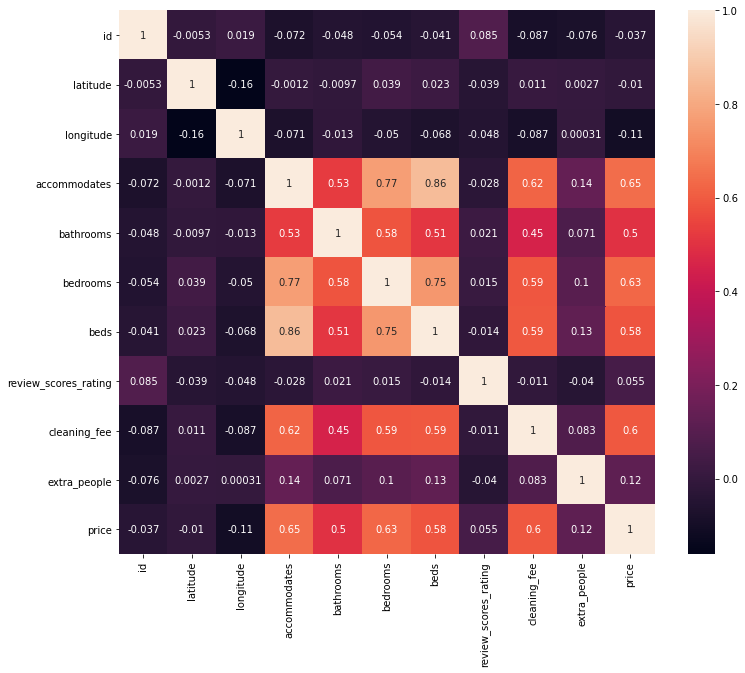

In [227]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

From the correlation chart, there are some features that have quite strong correlation with the price. Accommodates, bathrooms, bedroom, beds, cleaning_fee has correlation score with price above 0.5.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

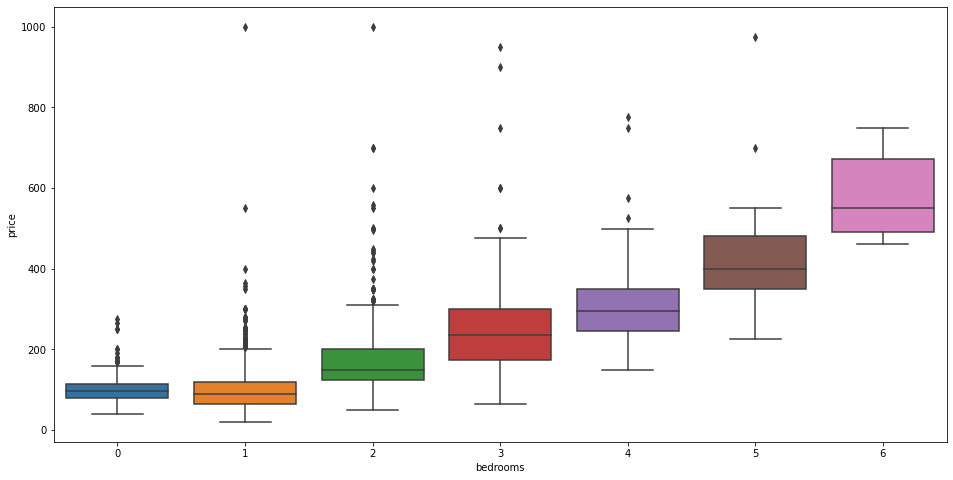

In [228]:
plt.figure(figsize=(16,8))
sns.boxplot( data=df, x='bedrooms', y='price')

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

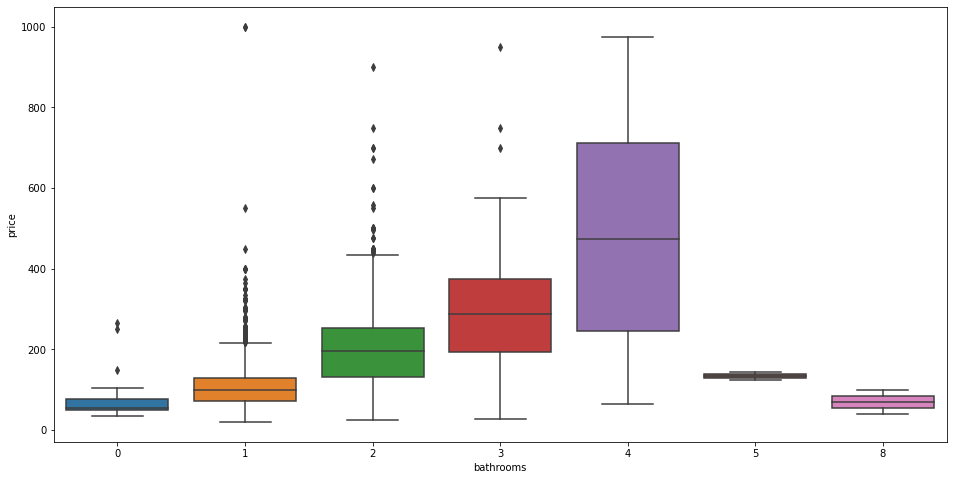

In [229]:
plt.figure(figsize=(16,8))
sns.boxplot( data=df, x='bathrooms', y='price')

<AxesSubplot:xlabel='beds', ylabel='price'>

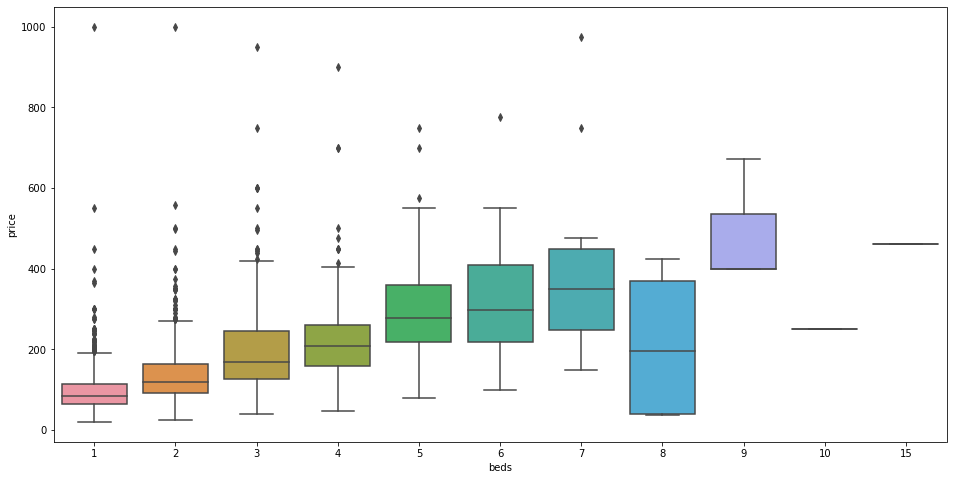

In [230]:
plt.figure(figsize=(16,8))
sns.boxplot( data=df, x='beds', y='price')

<AxesSubplot:xlabel='accommodates', ylabel='price'>

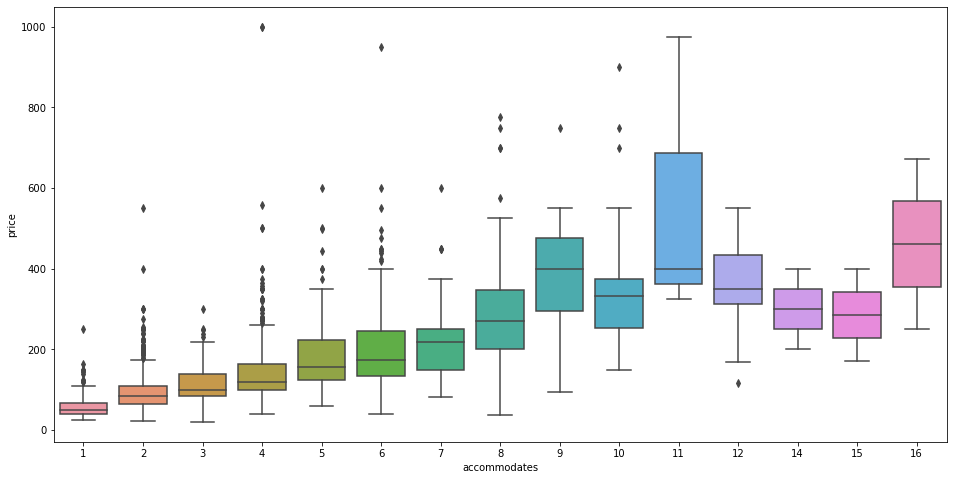

In [231]:
plt.figure(figsize=(16,8))
sns.boxplot( data=df, x='accommodates', y='price')

<AxesSubplot:xlabel='cleaning_fee', ylabel='price'>

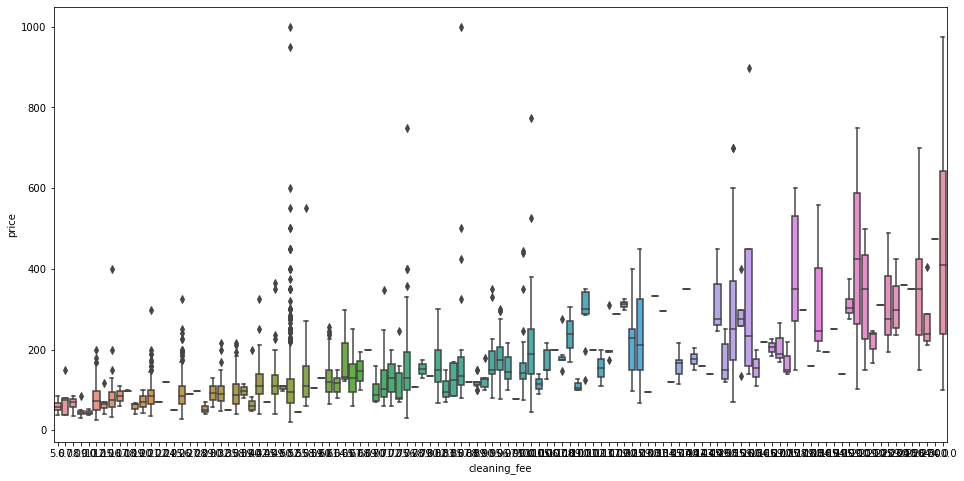

In [232]:
plt.figure(figsize=(16,8))
sns.boxplot( data=df, x='cleaning_fee', y='price')

<AxesSubplot:xlabel='extra_people', ylabel='price'>

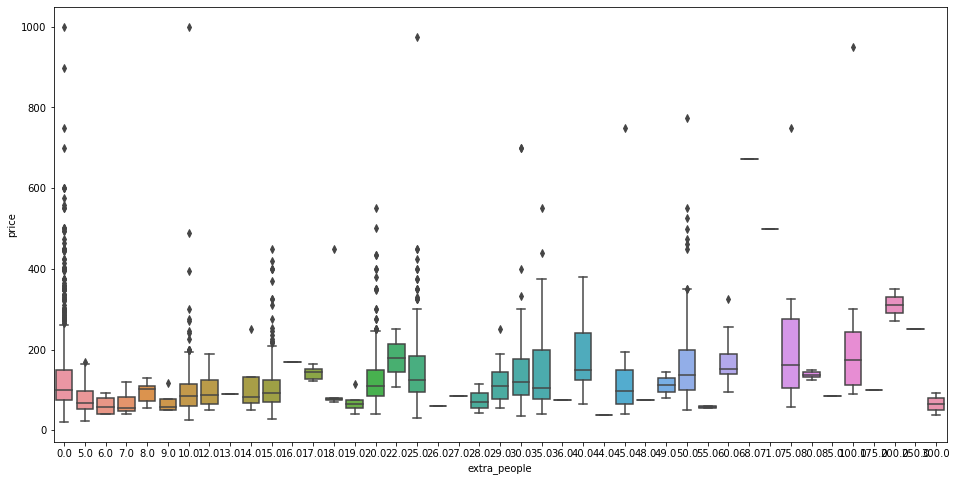

In [233]:
plt.figure(figsize=(16,8))
sns.boxplot( data=df, x='extra_people', y='price')

From the numerical point of view such as accomodates, beds, bathrooms, and bedrooms, the price distribution is pretty reasonable. the more number of these feature reflecting the more area of the property, hence the higher price of the property.

The verdict is clear that these four features are affecting the price of the property.

## Data Preparation

After clean and explore the data. I decided to pick the features that might affect price the most. After separating the data into categorical and numerical data, I encode the categorical data.

The next process is split the whole cleaned dataset into training and test. This data will be used for building the model using linear regression

In [234]:
df = pd.get_dummies(df, columns=['neighbourhood','property_type','room_type',], prefix = ['ne','pt','rt'])

In [235]:
X = df.drop(columns=['id','price'])
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Modeling

Building the model using linear regression to predict the price is quite simple. after fitting the training data, We just need to predict the price using the model we have built.

In [236]:
reg = LinearRegression()
reg.fit(X_train,y_train)
pred_reg = reg.predict(X_test)

## Evaluation

Let's compare the prediction from the model with the actual data. Using R2 square and mean absolute error to evaluate the accuracy of the model. The result is not quite safisfying since the model only have **R2 score = 0.65** and **Mean absolute error = 33.6**.

In [237]:
r2 = r2_score(y_test,pred_reg)
print('R2 score',r2)
print('Mean absolute error',mean_absolute_error(y_test,pred_reg))
print('Mean squared error',mean_squared_error(y_test,pred_reg))

R2 score 0.6511840914492615
Mean absolute error 33.60055512405545
Mean squared error 2660.111751384665


Text(0, 0.5, 'Actual')

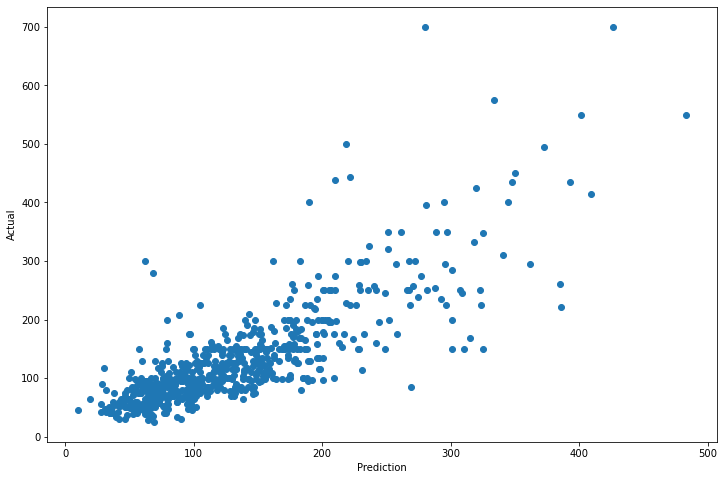

In [238]:
plt.figure(figsize=(12,8))
plt.scatter(x=pred_reg,y=y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')

## Conclusion

After examining problems / business, and look deeper into the dataset. We come to the to address the problem we defined at the very beginning
1. What features affecting the price?  
There are two type of feature in dataset, categorical and numerical type of feature. I conclude that in categorical type, neighbourhood, property type and room type affect price quite significantly. While in numerical type of data, accommodates, bathrooms, bedrooms, beds, and cleaning fee seems to have a strong relation with the price. 
2. What is the most popular property type and how about its price?  
The most popular property are house and apartment. And the price of these accomodation is spread pretty widely.
3. Can we predict the price accurately?  
Unfortunately with **R2 score = 0.6** and **Mean absolute error = 33.6**. the model does not predict the price pretty well. More adjustments are needed to get the model works accurately